In [7]:
# This notebook uses the same conda env as cropvideo -> ultralytics yolov8 is used for pose detection
import os
import cv2
import numpy as np
import json
from ultralytics import YOLO

In [2]:
data_dir = '../data/cropped_clips'
output_dir = '../data/pose_estimations'
MODEL = 'yolov8s-pose'

os.makedirs(output_dir, exist_ok=True)

for clip in os.listdir(data_dir):
    if 'annotated' in clip: continue # skip already annotated clips
    # check if already processed
    if os.path.exists(os.path.join(output_dir, clip.replace('.mp4', '.json'))):
        print(f'{clip} already processed, skipping')
        continue
    if clip.endswith('.mp4'):                       # process the video files
        print(f'Processing {clip}')
        clip_path = os.path.join(data_dir, clip)
        output_path = os.path.join(output_dir, clip.replace('.mp4', '.json'))

        # get the height and width of the video
        cap = cv2.VideoCapture(clip_path)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        cap.release()

        stream_writer = cv2.VideoWriter(output_path.replace('.json', '.mp4'), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

        cap = cv2.VideoCapture(clip_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()
        
        yolo = YOLO(MODEL)
        results = yolo(clip_path, device='cpu', stream=True, verbose=False)


        keypoints_data = []
        frame = 0
        import inspect
        have_keypoints = False
        for r in results:
            #plot without bounding box
            annot_fram = r.plot(boxes=False, labels=False, probs=False)
            keypoints = r.keypoints
            has_keypoints = len(keypoints) > 0
            kp_data_frame = {"frame": frame}
            for k in keypoints: # should only have one here cause we cropped to the one person
                if len(k.data) != 1:
                    print(k.data)
                    print('Multiple keypoint sets for frame, using first one but this may be the cause of an issue')
                for i, keypoint in enumerate(k.data[0]):
                    x, y, conf = keypoint
                    kp_data_frame[f'x{i}'] = int(x)
                    kp_data_frame[f'y{i}'] = int(y)
            keypoints_data.append(kp_data_frame) 
            stream_writer.write(annot_fram)

            frame += 1
        
        # save the keypoints to a json file
        with open(output_path, 'w') as f:
            json.dump(keypoints_data, f)

        stream_writer.release()

        
        print(f'Finished processing {clip}')

.DS_Store already processed, skipping
federer_front.mp4 already processed, skipping
front_backhand.mp4 already processed, skipping
return.json already processed, skipping
forehand.json already processed, skipping
stand_backhand.json already processed, skipping
run_backhand.mp4 already processed, skipping
forehand.mp4 already processed, skipping
run_backhand.json already processed, skipping
stand_backhand.mp4 already processed, skipping
HD_serve_side.json already processed, skipping
HD_serve_side.mp4 already processed, skipping
alcaraz_front.mp4 already processed, skipping
front_backhand.json already processed, skipping
alcaraz_front.json already processed, skipping
federer_front.json already processed, skipping
Processing sinner_front.mp4
Finished processing sinner_front.mp4
return.mp4 already processed, skipping


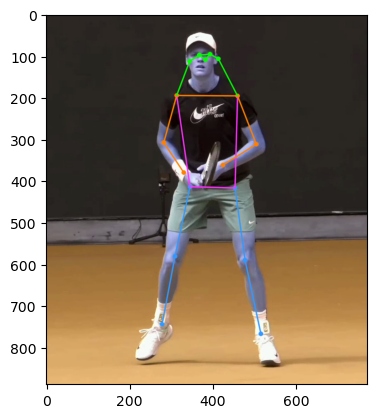

In [9]:
import matplotlib.pyplot as plt
plt.imshow(annot_fram)